In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import glob
import os
from matplotlib.ticker import FuncFormatter

# 2025 - 2029 Budget Plan by Department

In [14]:
data_directory = './data'
df = pd.read_csv(os.path.join(data_directory, 'FY25_Capital.csv')).fillna(0)

In [16]:
print(df.head())

   _id                             Department  \
0    1  Boston Centers for Youth and Families   
1    2  Boston Centers for Youth and Families   
2    3  Boston Centers for Youth and Families   
3    4  Boston Centers for Youth and Families   
4    5  Boston Centers for Youth and Families   

                                 Project_Name  \
0       BCYF Security and Technology Upgrades   
1  BCYF Tobin Community Center Retaining Wall   
2             BCYF North End Community Center   
3                                Pool Repairs   
4                        Youth Budget Round 4   

                                       Scope_Of_Work  \
0  Improvements to technology infrastructure and ...   
1  Repair or replace the retaining wall adjacent ...   
2  Design and construct a new North End Community...   
3  Renovate and upgrade locker rooms and pools in...   
4  Engage youth across the City using participato...   

                           PM_Department           Project_Status  \
0  B

In [22]:
print(df25['Total_Project_Budget'].describe())

count    4.260000e+02
mean     1.101801e+07
std      2.533627e+07
min      5.000000e+04
25%      1.000000e+06
50%      2.387500e+06
75%      9.000000e+06
max      2.235915e+08
Name: Total_Project_Budget, dtype: float64


In [24]:
project_count_per_department = df25['Department'].value_counts().reset_index()
project_count_per_department.columns = ['Department', 'Project_Count']
print(project_count_per_department)

                                 Department  Project_Count
0           Parks and Recreation Department             98
1                     Boston Public Schools             72
2                   Public Works Department             64
3                 Transportation Department             50
4                           Fire Department             23
5     Boston Centers for Youth and Families             17
6                     Boston Public Library             15
7                         Police Department             15
8            Property Management Department             14
9                    Environment Department             12
10                 Public Health Commission             11
11   Boston Planning and Development Agency             10
12  Department of Innovation and Technology              9
13                 Office of Arts & Culture              8
14                Mayor's Office of Housing              7
15                     Emergency Management             

In [28]:
budget_range_per_department = df25.groupby('Department')['Total_Project_Budget'].agg(['min', 'max']).reset_index()
print(budget_range_per_department)

                                 Department      min        max
0     Boston Centers for Youth and Families  1000000   88000000
1    Boston Planning and Development Agency   500000    7900000
2                     Boston Public Library   250000   50000000
3                     Boston Public Schools    50000  223591467
4   Department of Innovation and Technology   650000   27000000
5                      Emergency Management  1500000    1500000
6                    Environment Department   350000   75000000
7                           Fire Department   360000   46000000
8                 Mayor's Office of Housing  4000000   52000000
9                  Office of Arts & Culture   100000   22350000
10          Parks and Recreation Department    50000   50346965
11                        Police Department    60000   53794000
12           Property Management Department   500000  165000000
13                 Public Health Commission   200000   38220000
14                  Public Works Departm

In [30]:
total_budget_fy25 = df25['Total_Project_Budget'].sum()
print(f"Total FY25 Capital Budget: ${total_budget_fy25 / 1e9:.2f} billion")

Total FY25 Capital Budget: $4.69 billion


In [32]:
print(budget_per_department.head(5))

                         Department  Total_Project_Budget
3             Boston Public Schools            1279893904
14          Public Works Department            1146100449
12   Property Management Department             354480000
10  Parks and Recreation Department             339014235
15        Transportation Department             324842102


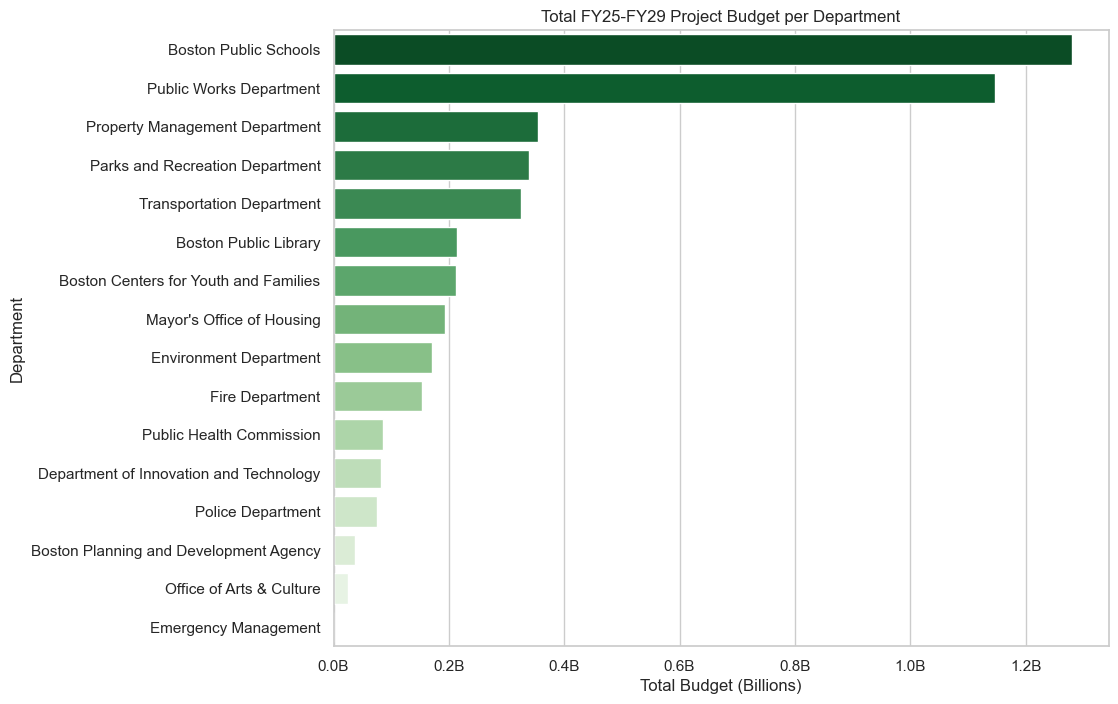

In [26]:
# Aggregate the total project budget by department
budget_per_department = df.groupby('Department')['Total_Project_Budget'].sum().reset_index()

# Sort values for a cleaner plot
budget_per_department = budget_per_department.sort_values(by='Total_Project_Budget', ascending=False)

# Set the plot style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create the barplot with 'hue' assigned and 'legend=False' to avoid the legend display
sns.barplot(
    data=budget_per_department,
    x='Total_Project_Budget',
    y='Department',
    hue='Department',
    palette='Greens_r',
    dodge=False,
    legend=False
)

# Format the x-axis to display in billions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

# Add labels and title
plt.xlabel('Total Budget (Billions)')
plt.ylabel('Department')
plt.title('Total FY25-FY29 Project Budget per Department')

# Display the plot
plt.show()

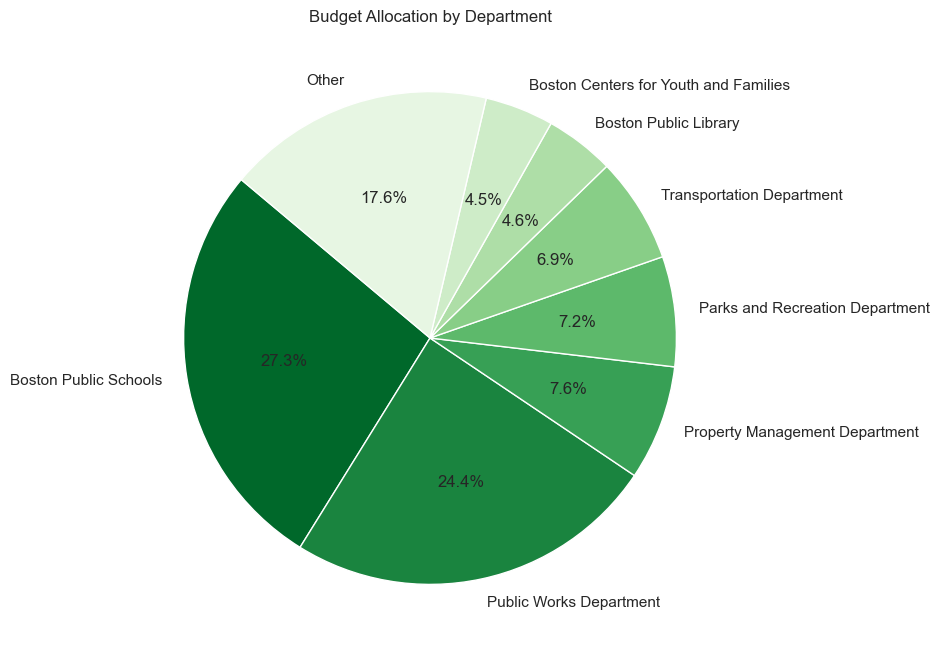

In [20]:
# Calculate the total budget for percentage calculation
total_budget = budget_per_department['Total_Project_Budget'].sum()

# Define a threshold percentage
threshold_percentage = 4.5

# Filter departments with a contribution less than the threshold and group them under "Other"
budget_per_department['Percentage'] = (budget_per_department['Total_Project_Budget'] / total_budget) * 100
filtered_data = budget_per_department[budget_per_department['Percentage'] >= threshold_percentage]
other_budget = budget_per_department[budget_per_department['Percentage'] < threshold_percentage]['Total_Project_Budget'].sum()

# Create an "Other" row as a DataFrame
if other_budget > 0:
    other_row = pd.DataFrame({
        'Department': ['Other'],
        'Total_Project_Budget': [other_budget],
        'Percentage': [(other_budget / total_budget) * 100]
    })
    
    # Concatenate the "Other" row with the filtered data
    filtered_data = pd.concat([filtered_data, other_row], ignore_index=True)

# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    filtered_data['Total_Project_Budget'],
    labels=filtered_data['Department'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Greens_r', n_colors=len(filtered_data))
)
plt.title('Budget Allocation by Department')

# Display the plot
plt.show()
